# Hamiltonian Monte Carlo Only

Joint target will be $\pi(q, p) = \pi(p \mid q) \pi(q)$ where we choose $\pi(p \mid q) = \mathcal{N}(0, M)$. The Hamiltonian is given by
$$
H(q, p) = -\log \pi(p \mid q) - \log \pi(q)
$$
Hamilton's equaitons describing the dynamics are
$$
\begin{align*}
\frac{d q}{dt} &= \partial_p K \\
\frac{d p}{dt} &= -\partial_q K - \partial_q V
\end{align*}
$$

Given our choice of the conditional distribution we have 
$$
K(q, p) = - \log \pi(p\mid q) = \frac{1}{2} p^\top M^{-1} p + \log(2\pi\text{det}(M))
$$

Its partial derivatives are therefore
$$
\begin{align*}
\partial_q K(q, p) &= 0 \\
\partial_p K(q, p) &= M^{-1}p
\end{align*}
$$

Similarly, since our target density is given by $\pi(q) = \mathcal{N}(\mu, \Sigma)$ we get
$$
-\partial_q V(q) = -\Sigma^{-1} (q - \mu)
$$

Hamilton's equations therefore become
$$
\begin{align*}
    \frac{dq}{dt} &= M^{-1}p \\
    \frac{dp}{dt} &= -\Sigma^{-1}(q - \mu)
\end{align*}
$$

In [7]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from Manifolds.RotatedEllipse import RotatedEllipse
from HMC.gaussian_hmc import GaussianTargetHMC
from utils import quick_MVN_marginals, quick_MVN_scatter

In [2]:
# Settings
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])  # Covariance Matrix of Target Distribution
mu = np.zeros(2)                              # Mean of target distribution
n = 20000                                     # Number of samples
T = 5                                         # Total integration time
epsilon = 0.05                                # Step size
M = np.eye(2)                                 # Coviariance Matrix for momentum distribution

# Target distribution
target = multivariate_normal(mean=mu, cov=Sigma)

In [3]:
# Grab starting position
q0 = target.rvs()

# Instantiate HMC
hmc = GaussianTargetHMC(q0, n, M, T, epsilon, Sigma, mu)

# Run HMC
samples = hmc.sample()

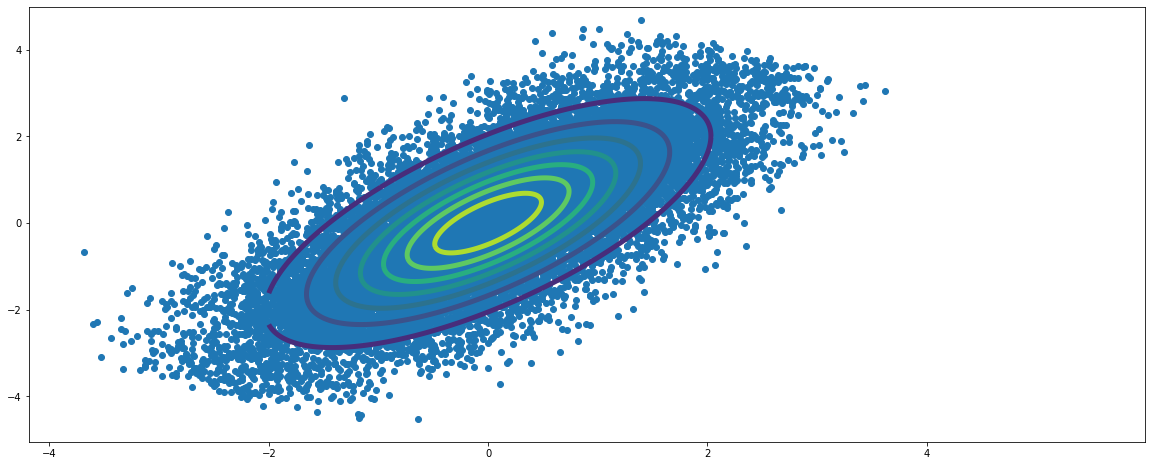

In [8]:
quick_MVN_scatter(samples, target)

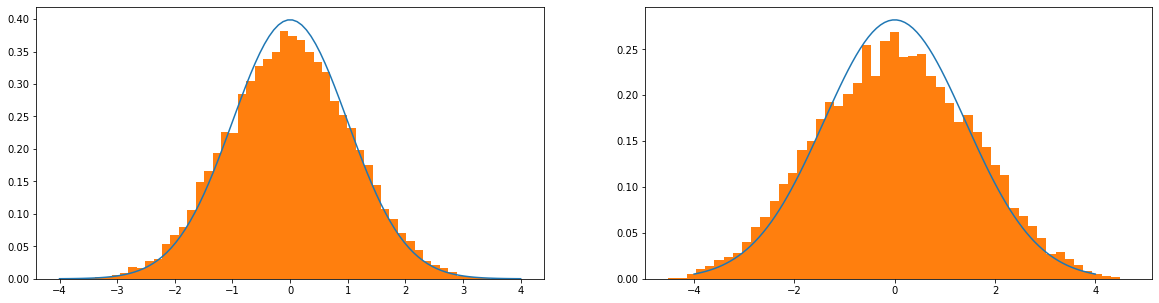

In [9]:
quick_MVN_marginals(samples, target)

# Run Again but with 2 million Samples

In [47]:
n = 2000000                                     # Number of samples
T = 5                                           # Total integration time
epsilon = 0.1                                   # Step size
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])
mu = np.zeros(2)    
q0 = target.rvs()
target = multivariate_normal(mean=mu, cov=Sigma)
M = np.eye(2) 
hmc = GaussianTargetHMC(q0, n, M, T, epsilon, Sigma, mu)

##### First run took:

CPU times: user 25min 27s, sys: 785 ms, total: 25min 28s

Wall time: 25min 24s

##### Second run 

CPU times: user 25min 28s, sys: 705 ms, total: 25min 29s

Wall time: 25min 26s

In [48]:
%%time
samples = hmc.sample()

CPU times: user 25min 28s, sys: 705 ms, total: 25min 29s
Wall time: 25min 26s


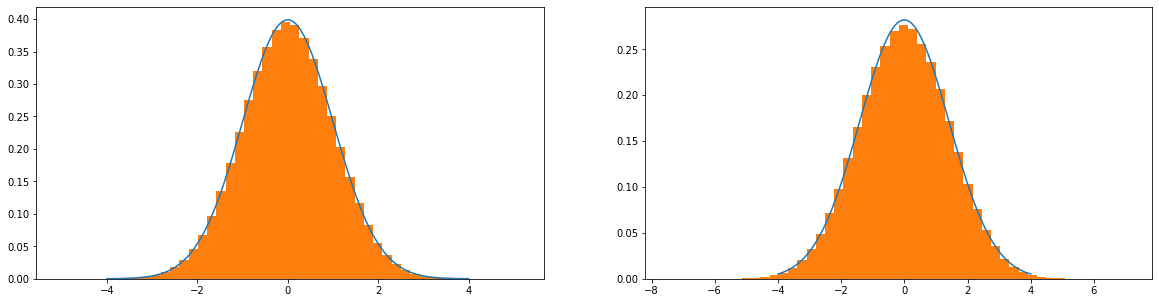

In [49]:
quick_MVN_marginals(samples, target)

In [58]:
from scipy.stats import gaussian_kde
import scipy
density = gaussian_kde(samples[:, 0])
xdata = np.linspace(-4, 4,100)

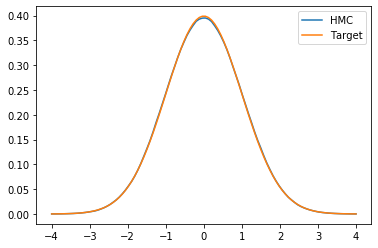

In [59]:
marginal_x = lambda x: scipy.stats.norm(loc=target.mean[0], scale=np.sqrt(target.cov[0, 0])).pdf(x)
fig, ax = plt.subplots()
ax.plot(xdata, density(xdata), label="HMC")
ax.plot(xdata, marginal_x(xdata), label="Target")
plt.legend()
plt.show()